<a href="https://colab.research.google.com/github/saschaschworm/dsb/blob/master/Exercises/fraud_purchases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fraud Purchases

## Package Import and Configuration

In [0]:
# Magic Commands
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# Matlotlib Configuration
plt.style.use('default')

## Data Import and Preprocessing

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/saschaschworm/dsb/master/Data%20Sets/Demos%20and%20Exercises/fraud_transactions/fraud_transactions.csv')

### Data Preview

In [3]:
data.head()

,mean_prch_5w,prch_this_w
0,82,74
1,81,84
2,80,127
3,87,80
4,72,75


### Data Visualization

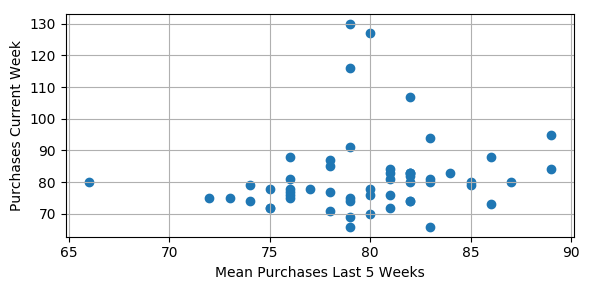

In [4]:
fig, ax = plt.subplots(figsize=(6, 3))

ax.scatter(data['mean_prch_5w'], data['prch_this_w'])

ax.set_xlabel('Mean Purchases Last 5 Weeks')
ax.set_ylabel('Purchases Current Week')
ax.grid()

plt.tight_layout()
plt.show()

### Data Preprocessing

In [0]:
X = data[['mean_prch_5w', 'prch_this_w']].values

## Local Outlier Factor

In [0]:
lof = LocalOutlierFactor(n_neighbors=20)
classification = lof.fit_predict(X)

### Result

In [0]:
data['anomaly'] = classification
normal_instances = data[data['anomaly'] == 1]
abnormal_instances = data[data['anomaly'] == -1]

In [8]:
normal_instances.head()

,mean_prch_5w,prch_this_w,anomaly
0,82,74,1
1,81,84,1
3,87,80,1
4,72,75,1
5,81,76,1


In [9]:
abnormal_instances.head()

,mean_prch_5w,prch_this_w,anomaly
2,80,127,-1
14,66,80,-1
15,82,107,-1
16,79,116,-1
22,89,95,-1


### Visualization

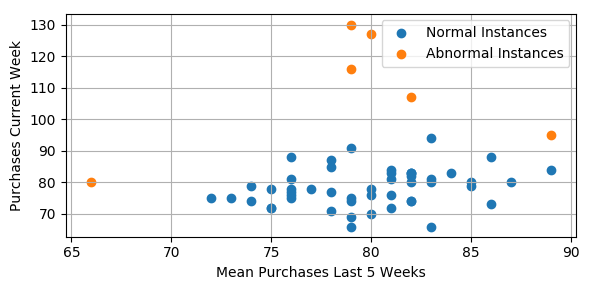

In [10]:
fig, ax = plt.subplots(figsize=(6, 3))

ax.scatter(normal_instances['mean_prch_5w'], normal_instances['prch_this_w'], label='Normal Instances')
ax.scatter(abnormal_instances['mean_prch_5w'], abnormal_instances['prch_this_w'], label='Abnormal Instances')


ax.set_xlabel('Mean Purchases Last 5 Weeks')
ax.set_ylabel('Purchases Current Week')
ax.grid()
ax.legend()

plt.tight_layout()
plt.show()